
# Liner regression

## simple linear regression

In [1]:
import numpy as numpy
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('placement.csv')


In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package in lpa')

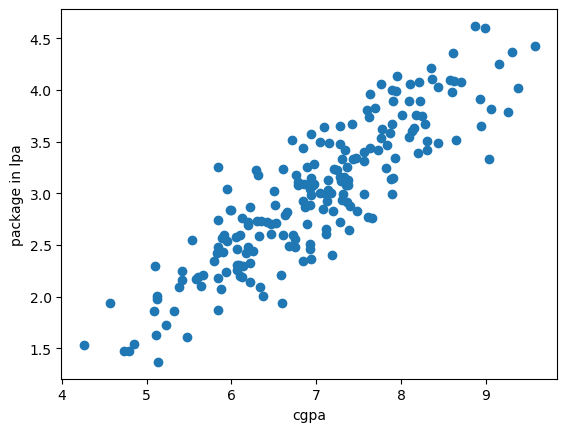

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')    #used to give label to x axis
plt.ylabel('package in lpa')

In [5]:
X=df.iloc[:,0:1]
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [6]:
Y=df.iloc[:,1:2]
Y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr=LinearRegression()


In [10]:
lr.fit(X_train,y_train)

LinearRegression()

In [11]:
X_test.head()

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57


In [12]:
y_test.head()

,package
112,4.10
29,3.49
182,2.08
199,2.33
193,1.94


In [13]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

c:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3.89111601]])

In [14]:
lr.predict(X_test.iloc[1].values.reshape(1,1))

c:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3.09324469]])

Text(0, 0.5, 'package in lpa')

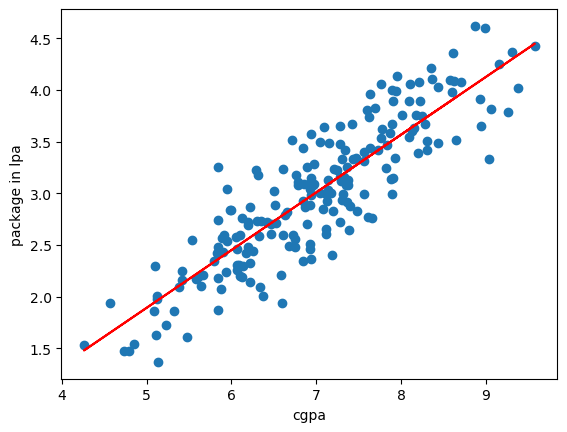

In [15]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('cgpa')    #used to give label to x axis
plt.ylabel('package in lpa')

In [16]:
lr.coef_   #slope of line

array([[0.55795197]])

In [17]:
b=lr.intercept_         #intercept
b

array([-0.89611192])

# making our own simple lr(ols) algorithm


In [19]:
class MeraLR:
    def __init__(self):
        self.m=None
        self.b=None

    def fit(self,X_train,y_train):
        num=0
        den=0

        for i in range(X_train.shape[0]):
            num=num+((X_train[i]-X_train.mean())*(y_train[i]-y_train.mean()))
            den=den+((X_train[i]-X_train.mean())*(X_train[i]-X_train.mean()))

        self.m=num/den
        self.b=y_train.mean()-(self.m*X_train.mean())
        print(self.m)
        print(self.b)
    
    def pridict(self,X_test):
        print(X_test)
        return self.m*X_test+self.b

In [21]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [22]:
X=df.iloc[:,0].values

In [23]:
X


array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
       6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94, 7.48, 7.28, 6.85,
       6.14, 6.19, 6.53, 7.28, 8.31, 5.42, 5.94, 7.15, 7.36, 8.1 , 6.96,
       6.35, 7.34, 6.87, 5.99, 5.9 , 8.62, 7.43, 9.38, 6.89, 5.95, 7.66,
       5.09, 7.87, 6.07, 5.84, 8.63, 8.87, 9.58, 9.26, 8.37, 6.47, 6.86,
       8.2 , 5.84, 6.6 , 6.92, 7.56, 5.61, 5.48, 6.34, 9.16, 7.36, 7.6 ,
       5.11, 6.51, 7.56, 7.3 , 5.79, 7.47, 7.78, 8.44, 6.85, 6.97, 6.94,
       8.99, 6.59, 7.18, 7.63, 6.1 , 5.58, 8.44, 4.26, 4.79, 7.61, 8.09,
       4.73, 6.42, 7.11, 6.22, 7.9 , 6.79, 5.83, 6.63, 7.11, 5.98, 7.69,
       6.61, 7.95, 6.71, 5.13, 7.05, 7.62, 6.66, 6.13, 6.33, 7.76, 7.77,
       8.18, 5.42, 8.58, 6.94, 5.84, 8.35, 9.04, 7.12, 7.4 , 7.39, 5.23,
       6.5 , 5.12, 5.1 , 6.06, 7.33, 5.91, 6.78, 7.93, 7.29, 6.68, 6.37,
       5.84, 6.05, 7.2 , 6.1 , 5.64, 7.14, 7.91, 7.19, 7.91, 6.76, 6.93,
       4.85, 6.17, 5.84, 6.07, 5.66, 7.57, 8.28, 6.